In [1]:
import numpy as np
import pandas as pd  # for data analytics

# The two packages below are for plotting
import seaborn as sns  #seaborn has nice features. Need to load pyplot with seaborn at the same time
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [4]:
df = pd.read_csv('national_accidents_attributes_adjusted.csv')

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)
df.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,CALM,7.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,97.0,29.70,10.0,CALM,7.0,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,55.0,29.65,10.0,CALM,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1,1


In [6]:
df.describe()

,Severity,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Speed_mph,Precipitation_in,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
count,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06
mean,2.222448e+00,6.237918e+01,6.308089e+01,2.955843e+01,9.151159e+00,7.784320e+00,6.405431e-03,4.300181e-01,1.000210e-01,2.837018e-02,8.616128e-03,1.342003e-02,1.827625e-02,2.501538e-03,1.527592e-04,5.907816e-06,1.265961e-05,9.431238e-02,9.056876e-01,1.054959e-01,1.727977e-01
std,5.752754e-01,1.832461e+01,2.293234e+01,1.018704e+00,2.932016e+00,5.185903e+00,1.014427e-01,4.950785e-01,3.850142e-01,1.660281e-01,9.242239e-02,1.150649e-01,1.339487e-01,6.531417e-02,1.235864e-02,2.430594e-03,3.558013e-03,2.922629e-01,2.922629e-01,3.071914e-01,3.780725e-01
min,1.000000e+00,-2.790000e+01,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.100000e+01,4.700000e+01,2.947000e+01,1.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,6.400000e+01,6.500000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,7.600000e+01,8.200000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+00,1.184000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.698876e+02,2.400000e+01,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.Severity_simple.value_counts()

0    980128
1    204743
Name: Severity_simple, dtype: int64

In [8]:
catvar = ['Wind_Direction','Sunrise_Sunset']

In [9]:
# One-hot encoding for catvar
X_cat = df[catvar]

from sklearn.preprocessing import OneHotEncoder
my_encoder = OneHotEncoder(handle_unknown = 'ignore',sparse = False)
X_encoded = my_encoder.fit_transform(X_cat)

In [10]:
X_encoded.shape

(1184871, 20)

In [11]:
print(my_encoder.categories_[0])
X_encoded_cols = (list(my_encoder.categories_[0])+
                 list(my_encoder.categories_[1]))
print(X_encoded_cols)

['CALM' 'E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW'
 'SW' 'VAR' 'W' 'WNW' 'WSW']
['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Day', 'Night']


In [12]:
X_encoded_df = pd.DataFrame(data = X_encoded, columns = X_encoded_cols)

In [13]:
X_encoded_df.head()

,CALM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW,Day,Night
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
# Add encoded X_cat into df
df2 = pd.concat([df, X_encoded_df], axis  = 1)

In [15]:
num_var = ['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in']
for col in num_var:
    df2[col+'_cubic_root'] = np.cbrt(df2[col])

In [16]:
df2.isnull().sum()

Severity                       0
Start_Time                     0
City                           0
State                          0
Weather_Timestamp              0
Temp_F                         0
Humidity_percent               0
Pressure_in                    0
Visibility_mi                  0
Wind_Direction                 0
Wind_Speed_mph                 0
Precipitation_in               0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Sunrise_Sunset                 0
Street                         0
Cross_street                   0
CLOUDY                         0
RAIN                           0
FOG       

In [17]:
col = list(df2.columns)
print(col)
X_unwanted = ['Severity','Start_Time','Weather_Timestamp','Severity_simple','Wind_Direction','Sunrise_Sunset']
X_location = ['City','State','Street','Cross_street']
X_not_relevant = ['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S',
                  'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW']
X_multicollinear = ['Non_workday','Day']
X_cubic_transformed = ['Temp_F_cubic_root', 'Humidity_percent_cubic_root', 'Pressure_in_cubic_root',
                       'Visibility_mi_cubic_root', 'Wind_Speed_mph_cubic_root', 'Precipitation_in_cubic_root']
X_num = ['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in']

['Severity', 'Start_Time', 'City', 'State', 'Weather_Timestamp', 'Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Direction', 'Wind_Speed_mph', 'Precipitation_in', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Street', 'Cross_street', 'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'WINDY', 'SNOW', 'SLEET', 'DUST', 'TORNADO', 'HAIL', 'Non_workday', 'Work_day', 'Rush_hour', 'Severity_simple', 'CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Day', 'Night', 'Temp_F_cubic_root', 'Humidity_percent_cubic_root', 'Pressure_in_cubic_root', 'Visibility_mi_cubic_root', 'Wind_Speed_mph_cubic_root', 'Precipitation_in_cubic_root']


In [18]:
X_no_trans = [i for i in col if (i not in X_unwanted and
                                 i not in X_location and
                                 i not in X_multicollinear and
                                 i not in X_cubic_transformed)]
print(X_no_trans)

['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'WINDY', 'SNOW', 'SLEET', 'DUST', 'TORNADO', 'HAIL', 'Work_day', 'Rush_hour', 'CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Night']


In [19]:
X_trans = [i for i in col if (i not in X_unwanted and
                                 i not in X_location and
                                 i not in X_multicollinear and
                                 i not in X_num)]
print(X_trans)

['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'WINDY', 'SNOW', 'SLEET', 'DUST', 'TORNADO', 'HAIL', 'Work_day', 'Rush_hour', 'CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Night', 'Temp_F_cubic_root', 'Humidity_percent_cubic_root', 'Pressure_in_cubic_root', 'Visibility_mi_cubic_root', 'Wind_Speed_mph_cubic_root', 'Precipitation_in_cubic_root']


## Data with no transformation 

In [20]:
y_nt = df2['Severity_simple']
X_nt = df2[X_no_trans]

In [21]:
X_nt_train, X_nt_test, y_nt_train, y_nt_test = train_test_split(X_nt, y_nt, test_size = 0.3, random_state = 42)

In [22]:
Counter(y_nt_train)

Counter({0: 686027, 1: 143382})

In [23]:
oversample = RandomOverSampler(random_state = 0)

In [24]:
X_nt_over, y_nt_over = oversample.fit_resample(X_nt_train, y_nt_train)

In [25]:
print(Counter(y_nt_over))

Counter({0: 686027, 1: 686027})


In [26]:
undersample = RandomUnderSampler(random_state = 0)

In [27]:
X_nt_under, y_nt_under = undersample.fit_resample(X_nt_train, y_nt_train)

In [28]:
print(Counter(y_nt_under))

Counter({0: 143382, 1: 143382})


## Data with transformation (cubic root for numerical)

In [29]:
y_t = df2['Severity_simple']
X_t = df2[X_trans]

In [30]:
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t, y_t, test_size = 0.3, random_state = 42)

In [31]:
X_t_over, y_t_over = oversample.fit_resample(X_t_train, y_t_train)
print(Counter(y_t_over))

Counter({0: 686027, 1: 686027})


In [32]:
X_t_under, y_t_under = undersample.fit_resample(X_t_train, y_t_train)
print(Counter(y_t_under))

Counter({0: 143382, 1: 143382})


## Logistic regression 

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### No sampling, no transformation (very bad confusion matrix, Recall and F1 score)

In [34]:
lg_normal = logreg.fit(X_nt_train, y_nt_train)
y_nt_test_pred = lg_normal.predict(X_nt_test)

In [35]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_nt_test, y_nt_test_pred)
print(conf_matrix)

[[294039     62]
 [ 61334     27]]


In [36]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Precision score:',precision_score(y_nt_test, y_nt_test_pred))
print('Recall score:', recall_score(y_nt_test, y_nt_test_pred))
print('Accuracy score:', accuracy_score(y_nt_test, y_nt_test_pred))
print('F1 score:', f1_score(y_nt_test, y_nt_test_pred))

Precision score: 0.30337078651685395
Recall score: 0.0004400189045158977
Accuracy score: 0.8272783026033725
F1 score: 0.0008787632221318145


AUC for logistic regression: 0.6064165042435491


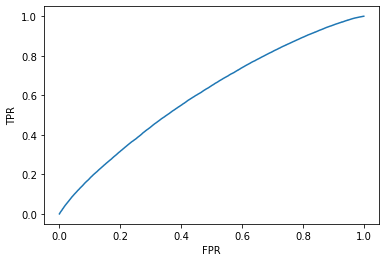

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

my_prob = lg_normal.predict_proba(X_nt_test)[:,1]

# Get Measures
fpr, tpr, threshold = roc_curve(y_nt_test, my_prob)

# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

print("AUC for logistic regression:", roc_auc_score(y_nt_test, my_prob)) # Get Area Under the Curve (AUC)

### Under sampling, no scaling, no transformation (improved confusion matrix, Recall and F1 score)

In [38]:
lg_under = logreg.fit(X_nt_under,y_nt_under)
y_nt_test_pred = lg_under.predict(X_nt_test)

In [39]:
conf_matrix = confusion_matrix(y_nt_test, y_nt_test_pred)
print(conf_matrix)

[[171092 123009]
 [ 26593  34768]]


In [40]:
print('Precision score:',precision_score(y_nt_test, y_nt_test_pred))
print('Recall score:', recall_score(y_nt_test, y_nt_test_pred))
print('Accuracy score:', accuracy_score(y_nt_test, y_nt_test_pred))
print('F1 score:', f1_score(y_nt_test, y_nt_test_pred))

Precision score: 0.22036164967010402
Recall score: 0.5666139730447679
Accuracy score: 0.5791336345375877
F1 score: 0.31731602916883433


AUC for logistic regression: 0.6075934678854894


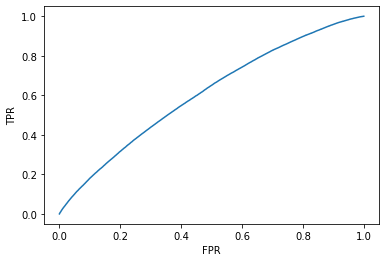

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

my_prob = lg_under.predict_proba(X_nt_test)[:,1]

# Get Measures
fpr, tpr, threshold = roc_curve(y_nt_test, my_prob)

# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

print("AUC for logistic regression:", roc_auc_score(y_nt_test, my_prob)) # Get Area Under the Curve (AUC)

## Oversampling, no scaling, no transformation (less improvement compared to undersampling

In [42]:
lg_over = logreg.fit(X_nt_over,y_nt_over)
y_nt_test_pred = lg_over.predict(X_nt_test)

In [43]:
conf_matrix = confusion_matrix(y_nt_test, y_nt_test_pred)
print(conf_matrix)

[[170374 123727]
 [ 26071  35290]]


In [44]:
print('Precision score:',precision_score(y_nt_test, y_nt_test_pred))
print('Recall score:', recall_score(y_nt_test, y_nt_test_pred))
print('Accuracy score:', accuracy_score(y_nt_test, y_nt_test_pred))
print('F1 score:', f1_score(y_nt_test, y_nt_test_pred))

Precision score: 0.2219259576020174
Recall score: 0.5751210051987419
Accuracy score: 0.5785822394517558
F1 score: 0.3202679033297334


AUC for logistic regression: 0.6092782344578925


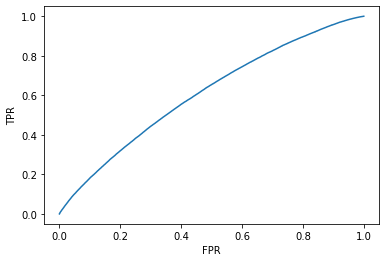

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

my_prob = lg_over.predict_proba(X_nt_test)[:,1]

# Get Measures
fpr, tpr, threshold = roc_curve(y_nt_test, my_prob)

# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

print("AUC for logistic regression:", roc_auc_score(y_nt_test, my_prob)) # Get Area Under the Curve (AUC)

## Optimize logistic regression parameter with oversampled data

In [46]:
from sklearn.metrics import accuracy_score

C_param_range = [0.001,0.01,0.1,1,10,100]
acc_table = pd.DataFrame(columns = ['C_parameter','F1'])
acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lg_tune = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lg_tune.fit(X_nt_over,y_nt_over)
    
    # Predict using model
    y_nt_test_pred = lg_tune.predict(X_nt_test)
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = f1_score(y_nt_test,y_nt_test_pred)
    j += 1

In [47]:
acc_table.head(6)
# C = 0.001 gives best result

,C_parameter,F1
0,0.001,0.320368
1,0.010,0.317761
2,0.100,0.317521
3,1.000,0.320268
4,10.000,0.317863
5,100.000,0.317576


In [48]:
lg_tuned = LogisticRegression(penalty = 'l2', C = 0.001,random_state = 0)

In [49]:
lg_over = lg_tuned.fit(X_nt_over,y_nt_over)
y_nt_test_pred = lg_over.predict(X_nt_test)

In [50]:
conf_matrix = confusion_matrix(y_nt_test, y_nt_test_pred)
print(conf_matrix)

[[168844 125257]
 [ 25766  35595]]


In [51]:
print('Precision score:',precision_score(y_nt_test, y_nt_test_pred))
print('Recall score:', recall_score(y_nt_test, y_nt_test_pred))
print('Accuracy score:', accuracy_score(y_nt_test, y_nt_test_pred))
print('F1 score:', f1_score(y_nt_test, y_nt_test_pred))

Precision score: 0.22129037873324547
Recall score: 0.5800915891201252
Accuracy score: 0.575136020165306
F1 score: 0.32036829528425426


AUC for logistic regression: 0.6094148433307445


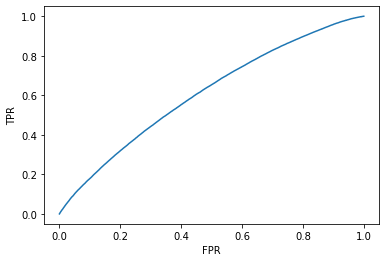

In [52]:
my_prob = lg_over.predict_proba(X_nt_test)[:,1]

# Get Measures
fpr, tpr, threshold = roc_curve(y_nt_test, my_prob)

# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

print("AUC for logistic regression:", roc_auc_score(y_nt_test, my_prob)) # Get Area Under the Curve (AUC)

## Finding best threshold for oversampled regression (best performance for non-transformed data

Best Threshold=0.494553, G-Mean=0.576


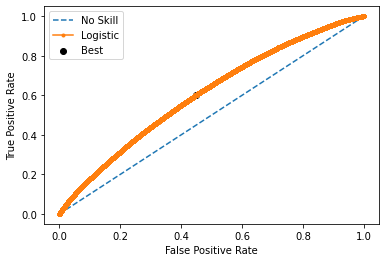

In [54]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
my_prob_train = lg_over.predict_proba(X_nt_over)[:,1]

# calculate roc curves from training data
fpr, tpr, thresholds = roc_curve(y_nt_over, my_prob_train)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show() # Threshold close enough to 0.5

In [55]:
THRESHOLD = 0.494553
preds = np.where(lg_over.predict_proba(X_nt_test)[:,1] > THRESHOLD, 1, 0)

In [56]:
conf_matrix = confusion_matrix(y_nt_test, preds)
print(conf_matrix)

[[161936 132165]
 [ 24259  37102]]


In [57]:
print('Precision score:',precision_score(y_nt_test, preds))
print('Recall score:', recall_score(y_nt_test, preds))
print('Accuracy score:', accuracy_score(y_nt_test, preds))
print('F1 score:', f1_score(y_nt_test, preds))

Precision score: 0.21919216385946463
Recall score: 0.6046511627906976
Accuracy score: 0.5599417096623549
F1 score: 0.32174757618329086


<AxesSubplot:>

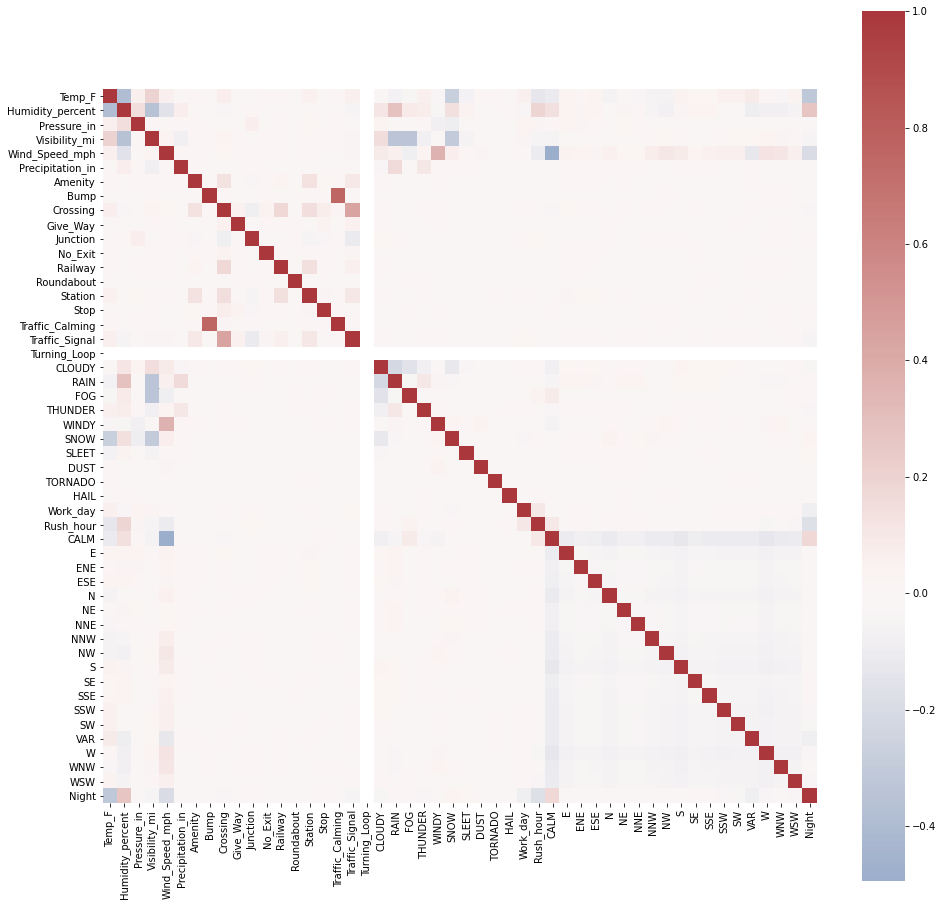

In [58]:
num_corr = df2[X_no_trans].corr()
#print(num_corr)
plt.figure(figsize = (16,16))
sns.heatmap(num_corr,cmap="vlag",square = True, xticklabels=True, yticklabels=True, center = 0)

## Oversampling, cubic root transformation (better than non-transformed data, logistic regression done with default parameters: C = 0.1, threshold = 0.5)

In [59]:
C_param_range = [0.001,0.01,0.1,1,10,100]
acc_table = pd.DataFrame(columns = ['C_parameter','F1'])
acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lg_tune = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lg_tune.fit(X_t_over,y_t_over)
    
    # Predict using model
    y_t_test_pred = lg_tune.predict(X_t_test)
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = f1_score(y_t_test,y_t_test_pred)
    j += 1

In [60]:
acc_table.head(6)
# C = 0.1 gives best result

,C_parameter,F1
0,0.001,0.330503
1,0.010,0.330548
2,0.100,0.330867
3,1.000,0.33086
4,10.000,0.33063
5,100.000,0.330554


In [61]:
lg_tuned = LogisticRegression(penalty = 'l2', C = 0.1 ,random_state = 0)

In [62]:
lg_over = lg_tuned.fit(X_t_over,y_t_over)
y_t_test_pred = lg_over.predict(X_t_test)

In [63]:
conf_matrix = confusion_matrix(y_t_test, y_t_test_pred)
print(conf_matrix)

[[168091 126010]
 [ 24219  37142]]


In [64]:
print('Precision score:',precision_score(y_t_test, y_t_test_pred))
print('Recall score:', recall_score(y_t_test, y_t_test_pred))
print('Accuracy score:', accuracy_score(y_t_test, y_t_test_pred))
print('F1 score:', f1_score(y_t_test, y_t_test_pred))

Precision score: 0.22765274100225558
Recall score: 0.6053030426492397
Accuracy score: 0.5773697329109722
F1 score: 0.33086725490283414


AUC for logistic regression: 0.6265244610758953


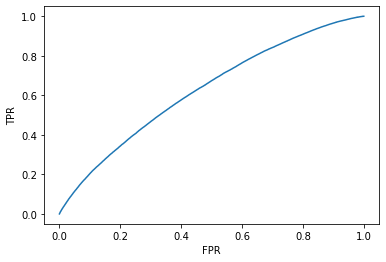

In [65]:
my_prob = lg_over.predict_proba(X_t_test)[:,1]

# Get Measures
fpr, tpr, threshold = roc_curve(y_t_test, my_prob)

# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

print("AUC for logistic regression:", roc_auc_score(y_nt_test, my_prob)) # Get Area Under the Curve (AUC)

Best Threshold=0.500591, G-Mean=0.587


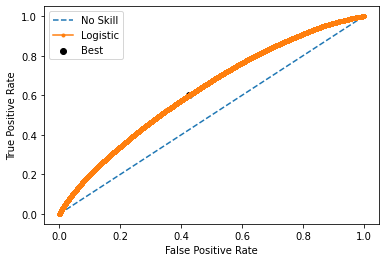

In [66]:
my_prob_train = lg_over.predict_proba(X_t_over)[:,1]

# calculate roc curves from training data
fpr, tpr, thresholds = roc_curve(y_t_over, my_prob_train)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show() # Threshold close enough to 0.5

In [67]:
THRESHOLD = 0.500591
preds = np.where(lg_over.predict_proba(X_t_test)[:,1] > THRESHOLD, 1, 0)

In [68]:
conf_matrix = confusion_matrix(y_t_test, preds)
print(conf_matrix)

[[168650 125451]
 [ 24324  37037]]


In [69]:
print('Precision score:',precision_score(y_t_test, preds))
print('Recall score:', recall_score(y_t_test, preds))
print('Accuracy score:', accuracy_score(y_t_test, preds))
print('F1 score:', f1_score(y_t_test, preds))

Precision score: 0.22793683225838215
Recall score: 0.6035918580205668
Accuracy score: 0.578646943977134
F1 score: 0.33091056917833


## Retrieve coefficients from the best logistic regression model (not very useful without knowing the significance level...)

In [70]:
from sklearn.metrics import accuracy_score

lg_over_coef = pd.DataFrame(columns = ['Attributes','Coef'])
lg_over_coef['Attributes'] = X_trans

coef = list(lg_over.coef_[0])

i = 0
while i < len(coef):
    lg_over_coef.iloc[i,1]=coef[i]
    i += 1

In [71]:
lg_over_coef.head(len(X_trans))

,Attributes,Coef
0,Amenity,-0.08895
1,Bump,-0.253805
2,Crossing,-0.426935
3,Give_Way,0.566184
4,Junction,0.378708
5,No_Exit,0.216358
6,Railway,0.317705
7,Roundabout,0.005415
8,Station,-0.466892
9,Stop,0.072341


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

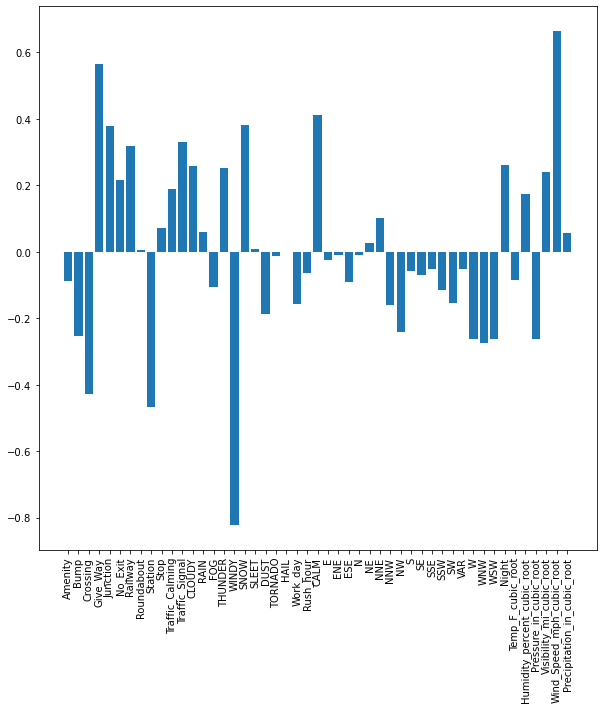

In [72]:
idx = np.array(lg_over.coef_[0]) != 0
x = np.array(X_trans)[idx]
y = lg_over.coef_[0][idx]

plt.figure(figsize = (10,10))
plt.bar(x,y)
pyplot.xticks(rotation=90)

In [73]:
df_coef = pd.DataFrame()
df_coef['AttributeName'] = X_trans
df_coef['Coef'] = lg_over.coef_[0]

In [74]:
df_coef.sort_values(by=['Coef'],key=abs, ascending=[False])

,AttributeName,Coef
17,WINDY,-0.823108
48,Wind_Speed_mph_cubic_root,0.664551
3,Give_Way,0.566184
8,Station,-0.466892
2,Crossing,-0.426935
25,CALM,0.411791
18,SNOW,0.380351
4,Junction,0.378708
11,Traffic_Signal,0.330427
6,Railway,0.317705


In [76]:
x_val = df_coef.sort_values(by=['Coef'],key=abs, ascending=[False])['AttributeName']
y_val = abs(df_coef.sort_values(by=['Coef'],key=abs, ascending=[False])['Coef'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

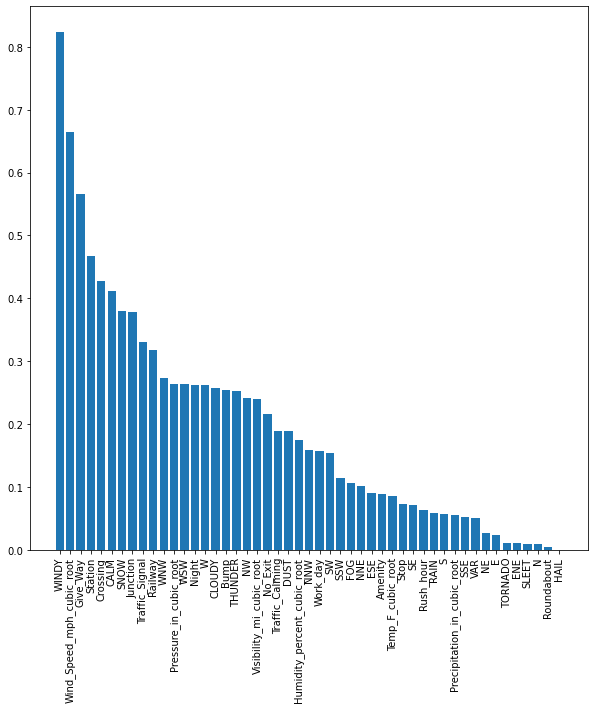

In [78]:
idx = np.array(y_val) != 0

x = np.array(x_val)[idx]
y = y_val[idx]

plt.figure(figsize = (10,10))
plt.bar(x,y)
pyplot.xticks(rotation=90)

In [79]:
df_coef.sort_values(by=['Coef'], ascending=[False])

,AttributeName,Coef
48,Wind_Speed_mph_cubic_root,0.664551
3,Give_Way,0.566184
25,CALM,0.411791
18,SNOW,0.380351
4,Junction,0.378708
11,Traffic_Signal,0.330427
6,Railway,0.317705
43,Night,0.262330
13,CLOUDY,0.257271
16,THUNDER,0.252542


In [80]:
x_val = df_coef.sort_values(by=['Coef'], ascending=[False])['AttributeName']
y_val = df_coef.sort_values(by=['Coef'], ascending=[False])['Coef']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

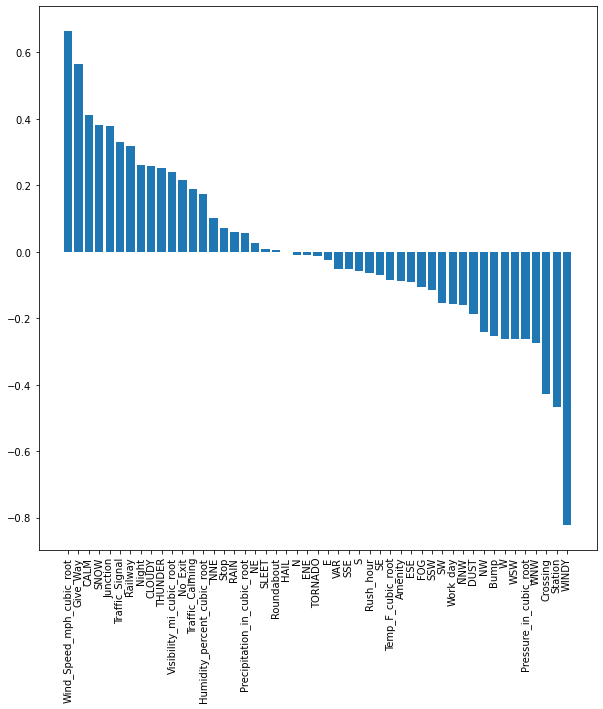

In [81]:
idx = np.array(y_val) != 0

x = np.array(x_val)[idx]
y = y_val[idx]

plt.figure(figsize = (10,10))
plt.bar(x,y)
pyplot.xticks(rotation=90)

In [ ]:
num_corr = df2[X_trans].corr()
#print(num_corr)
plt.figure(figsize = (16,16))
sns.heatmap(num_corr,cmap="vlag",square = True, xticklabels=True, yticklabels=True, center = 0)